In [74]:
import os
import re
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
# example filename: fitness_0-1-0.1-random_swap-5_pyage.txt
def parse_filename(filename):
    m = re.search('fitness_(.+?)_pyage.txt', filename)
    info = m.group(1)
    [ind, emas, mutation_prob, mutation_type, _] = info.split('-')
    return int(ind), bool(int(emas)), float(mutation_prob), mutation_type

In [121]:
def read_results():
    results = []
    for filename in os.listdir('.'):
        if filename.startswith('fitness_'):
            _, emas, mutation_prob, mutation_type = parse_filename(filename)
            with open(filename, 'r') as file:
                reader = csv.reader(file, delimiter=';')
                for iter_count, fitness in reader:
                    results.append((iter_count, fitness, emas, mutation_prob, mutation_type))
    return results

In [122]:
results = read_results()

df = pd.DataFrame(results)
df.columns = ['iteration', 'fitness', 'emas', 'mutation_prob', 'mutation_type']

In [123]:
def process(emas, mutation_prob, mutation_type):
    filtered = df[(df['emas'] == emas) & (df['mutation_prob'] == mutation_prob) & (df['mutation_type'] == mutation_type)]
    filtered = filtered[['iteration', 'fitness']].astype('int64')
    return filtered.groupby('iteration').mean()

In [163]:
def draw_all(one, two, three=None, legend=[], title=None, file=None):
    p1 = one.plot()
    p2 = two.plot(ax=p1)
    if three is not None:
        p3 = three.plot(ax=p2)
    plt.title(title)
    if title is not None:
        plt.legend(legend)
    if file is not None:
        plt.savefig(file)
    plt.show()

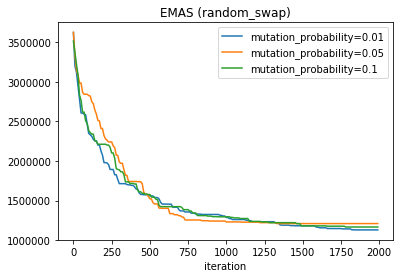

In [165]:
title ='EMAS (random_swap)'
file = 'emas_rnd_swap.png'
legend = ['mutation_probability=0.01', 'mutation_probability=0.05', 'mutation_probability=0.1']

one = process(emas=True, mutation_prob=0.01, mutation_type='random_swap')
two = process(emas=True, mutation_prob=0.05, mutation_type='random_swap')
three = process(emas=True, mutation_prob=0.1, mutation_type='random_swap')
draw_all(one, two, three, legend, title, file)

In [168]:
title = 'EMAS (neighbour_swap)'
file = 'emas_neigh_swap.png'
legend = ['mutation_probability=0.01', 'mutation_probability=0.05', 'mutation_probability=0.1']

one = process(emas=True, mutation_prob=0.01, mutation_type='neighbour_swap')
two = process(emas=True, mutation_prob=0.05, mutation_type='neighbour_swap')
three = process(emas=True, mutation_prob=0.1, mutation_type='neighbour_swap')
draw_all(one, two, three, legend, title, file)

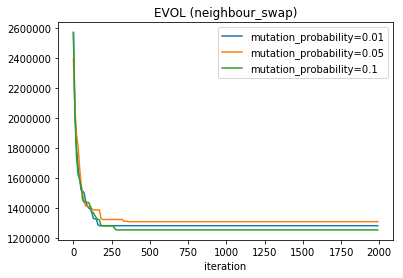

In [169]:
title = 'EVOL (neighbour_swap)'
file = 'evol_neigh_swap.png'
legend = ['mutation_probability=0.01', 'mutation_probability=0.05', 'mutation_probability=0.1']

one = process(emas=False, mutation_prob=0.01, mutation_type='neighbour_swap')
two = process(emas=False, mutation_prob=0.05, mutation_type='neighbour_swap')
three = process(emas=False, mutation_prob=0.1, mutation_type='neighbour_swap')
draw_all(one, two, three, legend, title, file)

In [170]:
title = 'EVOL (neighbour_swap)'
file = 'evol_rnd_swap.png'
legend = ['mutation_probability=0.01', 'mutation_probability=0.05', 'mutation_probability=0.1']

one = process(emas=False, mutation_prob=0.01, mutation_type='random_swap')
two = process(emas=False, mutation_prob=0.05, mutation_type='random_swap')
three = process(emas=False, mutation_prob=0.1, mutation_type='random_swap')
draw_all(one, two, three, legend, title, file)

In [176]:
title = 'EMAS vs EVOL (neighbour_swap)'
file = 'evol_vs_emas_neigh_swap.png'
legend = ['EMAS (mutation_prob=0.1)', 'EVOL (mutation_prob=0.1)']

one = process(emas=True, mutation_prob=0.1, mutation_type='neighbour_swap')
two = process(emas=False, mutation_prob=0.1, mutation_type='neighbour_swap')
draw_all(one, two, legend=legend, title=title, file=file)

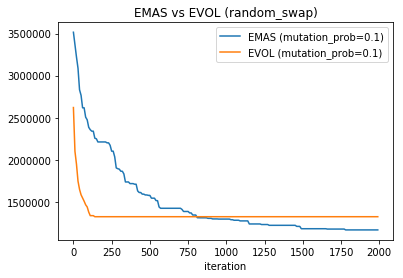

In [178]:
title = 'EMAS vs EVOL (random_swap)'
file = 'evol_vs_emas_rnd_swap.png'
legend = ['EMAS (mutation_prob=0.1)', 'EVOL (mutation_prob=0.1)']

one = process(emas=True, mutation_prob=0.1, mutation_type='random_swap')
two = process(emas=False, mutation_prob=0.1, mutation_type='random_swap')
draw_all(one, two, legend=legend, title=title, file=file)

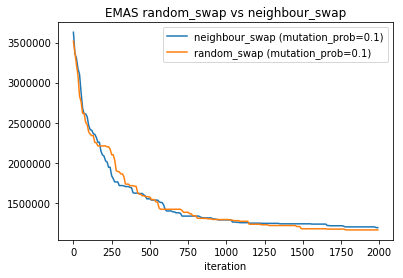

In [184]:
title = 'EMAS random_swap vs neighbour_swap'
file = 'emas_rnd_vs_neigh.png'
legend = ['neighbour_swap (mutation_prob=0.1)', 'random_swap (mutation_prob=0.1)']

one = process(emas=True, mutation_prob=0.1, mutation_type='neighbour_swap')
two = process(emas=True, mutation_prob=0.1, mutation_type='random_swap')
draw_all(one, two, legend=legend, title=title, file=file)

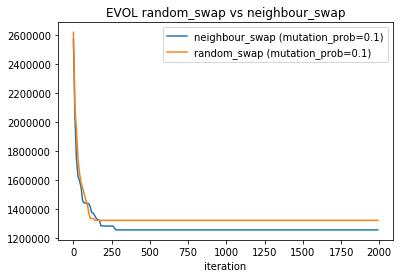

In [185]:
title = 'EVOL random_swap vs neighbour_swap'
file = 'evol_rnd_vs_neigh.png'
legend = ['neighbour_swap (mutation_prob=0.1)', 'random_swap (mutation_prob=0.1)']

one = process(emas=False, mutation_prob=0.1, mutation_type='neighbour_swap')
two = process(emas=False, mutation_prob=0.1, mutation_type='random_swap')
draw_all(one, two, legend=legend, title=title, file=file)